# **Employee Churn Predictor - ML Process**

## **Exploratory Data Analysis**

In [2]:
# Import libraries required for the analysis
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [27]:
# Load dataset
df = pd.read_csv('data/employee_churn_dataset.csv', sep=',', index_col=False, header = 0)
print(f'Dataset Shape: {df.shape}')
df.head(10)

Dataset Shape: (10000, 22)


,Employee ID,Age,Gender,Education Level,Marital Status,Tenure,Job Role,Department,Salary,Work Location,Performance Rating,Projects Completed,Training Hours,Promotions,Overtime Hours,Satisfaction Level,Work-Life Balance,Average Monthly Hours Worked,Absenteeism,Distance from Home,Manager Feedback Score,Churn
0,E00001,50,Male,Bachelor's,Married,5,Analyst,Marketing,93422,Remote,5,37,35,0,16,0.03,Poor,155,14,15,7.9,0
1,E00002,36,Male,Bachelor's,Married,4,Manager,Sales,44589,On-site,2,43,1,0,12,0.39,Average,162,2,8,5.2,0
2,E00003,29,Male,Bachelor's,Married,3,Sales,IT,56768,Hybrid,1,38,41,0,2,0.62,Poor,243,6,21,6.3,0
3,E00004,42,Male,Bachelor's,Single,12,Analyst,Sales,79009,On-site,1,39,33,0,8,0.73,Good,291,11,25,7.4,0
4,E00005,40,Other,Bachelor's,Married,1,Sales,HR,81982,On-site,3,49,30,0,13,0.52,Average,272,3,1,4.1,0
5,E00006,44,Male,Bachelor's,Single,12,Developer,HR,82669,On-site,2,4,68,0,2,0.06,Average,266,4,40,2.1,0
6,E00007,32,Male,High School,Married,12,Analyst,Marketing,127951,On-site,1,37,19,0,35,0.76,Average,233,10,10,4.9,0
7,E00008,32,Male,Master's,Single,6,Manager,Sales,93655,Remote,1,48,37,0,19,0.39,Average,204,1,14,7.3,0
8,E00009,45,Female,Master's,Single,4,Analyst,Sales,69050,Remote,3,12,74,0,45,0.18,Excellent,162,15,36,4.9,1
9,E00010,57,Male,High School,Married,12,Developer,Marketing,106153,Hybrid,3,14,94,0,17,0.26,Good,151,19,27,4.7,0


In [ ]:
# Check for datatypes, null-values and columns in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Employee ID                   10000 non-null  object 
 1   Age                           10000 non-null  int64  
 2   Gender                        10000 non-null  object 
 3   Education Level               10000 non-null  object 
 4   Marital Status                10000 non-null  object 
 5   Tenure                        10000 non-null  int64  
 6   Job Role                      10000 non-null  object 
 7   Department                    10000 non-null  object 
 8   Salary                        10000 non-null  int64  
 9   Work Location                 10000 non-null  object 
 10  Performance Rating            10000 non-null  int64  
 11  Projects Completed            10000 non-null  int64  
 12  Training Hours                10000 non-null  int64  
 13  Pr

In [21]:
#Check missing values
missing_values = df.isna().sum()
# print(type(missing_values.iloc[0]))
missing_values_percentage = (df.isna().mean()*100).apply(lambda x: (f"{x:.1f}%"))
missing_df = pd.DataFrame({'Missing' : missing_values, 
                           '% Missing' : missing_values_percentage
                           })
missing_df

,Missing,% Missing
Employee ID,0,0.0%
Age,0,0.0%
Gender,0,0.0%
Education Level,0,0.0%
Marital Status,0,0.0%
Tenure,0,0.0%
Job Role,0,0.0%
Department,0,0.0%
Salary,0,0.0%
Work Location,0,0.0%


In [72]:
# Check the outcome balance. Determine the relative frequency of people who stay or leave.
class_churn = ((df.groupby('Churn').aggregate({'Churn':'count'})/df.shape[0])*100)
print(type(class_churn))
class_churn_percentage = class_churn.map(lambda x: f'{x:.2f}%')
class_churn_percentage

<class 'pandas.core.frame.DataFrame'>


,Churn
Churn,
0,79.72%
1,20.28%


Index([0, 1], dtype='int64', name='Churn')


<function matplotlib.pyplot.show(close=None, block=None)>

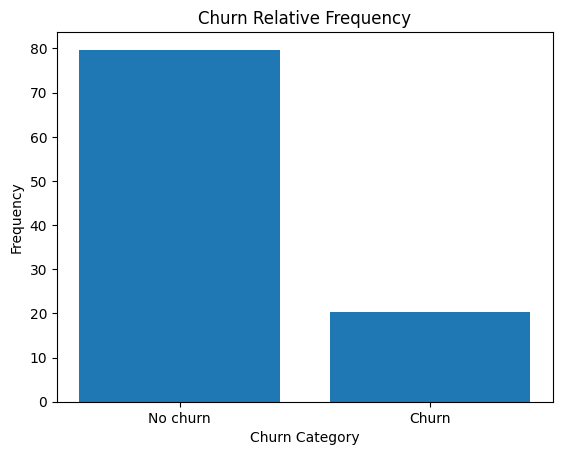

In [80]:
print(class_churn.index)
plt.bar(x=class_churn.index.tolist(), height=class_churn['Churn'] )
plt.title('Churn Relative Frequency')
plt.xlabel('Churn Category')
plt.ylabel('Frequency')
plt.xticks(ticks=[0,1], labels=['No churn', 'Churn'])
plt.show

The outcome variable which is Churn, in the figure above, shows a moderate class imbalance. In this context are class imbalance is considered moderate when the minor category is between 10%-30%, severe when it is lower than 5%, and balanced between. This analysis will be considered for decision_making in further steps like model parameters configuration.  